In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

%matplotlib inline

In [2]:
### Importing dataset for weather.

bna_weather = pd.read_csv("../data/bna_weather.csv")
bna_weather.head()

,Date,key,class,expire_time_gmt,obs_id,obs_name,valid_time_gmt,day_ind,temp,wx_icon,icon_extd,wx_phrase,pressure_tend,pressure_desc,dewPt,heat_index,rh,pressure,vis,wc,wdir,wdir_cardinal,gust,wspd,max_temp,min_temp,precip_total,precip_hrly,snow_hrly,uv_desc,feels_like,uv_index,qualifier,qualifier_svrty,blunt_phrase,terse_phrase,clds,water_temp,primary_wave_period,primary_wave_height,primary_swell_period,primary_swell_height,primary_swell_direction,secondary_swell_period,secondary_swell_height,secondary_swell_direction
0,2021-11-01 00:53:00,KBNA,observation,1635753180,KBNA,Nashville,1635745980,N,51,26,2600,Cloudy,1.0,Rising,43,51,74,29.59,10.0,51.0,360.0,N,NaN,9.0,68.0,51.0,NaN,0.0,NaN,Low,51.0,0.0,NaN,NaN,NaN,NaN,OVC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-11-01 01:30:00,KBNA,observation,1635755400,KBNA,Nashville,1635748200,N,50,29,2900,Partly Cloudy,NaN,NaN,42,50,74,29.59,10.0,50.0,350.0,N,NaN,8.0,NaN,NaN,NaN,0.0,NaN,Low,50.0,0.0,NaN,NaN,NaN,NaN,SCT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-11-01 01:53:00,KBNA,observation,1635756780,KBNA,Nashville,1635749580,N,49,33,3300,Fair,NaN,NaN,42,49,77,29.59,10.0,47.0,350.0,N,NaN,6.0,NaN,NaN,NaN,0.0,NaN,Low,47.0,0.0,NaN,NaN,NaN,NaN,CLR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-11-01 02:53:00,KBNA,observation,1635760380,KBNA,Nashville,1635753180,N,48,33,3300,Fair,NaN,NaN,41,48,77,29.60,10.0,48.0,360.0,N,NaN,3.0,NaN,NaN,NaN,0.0,NaN,Low,48.0,0.0,NaN,NaN,NaN,NaN,CLR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-11-01 03:53:00,KBNA,observation,1635763980,KBNA,Nashville,1635756780,N,47,33,3300,Fair,1.0,Rising Rapidly,41,47,80,29.61,10.0,47.0,NaN,CALM,NaN,0.0,NaN,NaN,NaN,0.0,NaN,Low,47.0,0.0,NaN,NaN,NaN,NaN,CLR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
np.shape(bna_weather)

(9739, 46)

In [4]:
### Importing dataset for all WeGo bus route information.

headway_data = pd.read_csv("../data/Headway Data.csv")
headway_data.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS
0,120211101,1,76447164,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,HBHS,4.0,1,36.107575,-86.812719,14:10:00,13:59:21,14:12:00,-2.000000,14.0,15.983333,1.983333,0,0,1,0,0.0,0,2,12.650000
1,120211101,1,76447165,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,21BK,3.0,0,36.138372,-86.800622,14:20:00,14:23:21,14:23:21,-3.350000,14.0,17.333333,3.333333,0,0,1,0,0.0,0,11,0.000000
2,120211101,1,76447166,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,MCC5_9,2.0,2,36.167091,-86.781923,14:39:00,14:36:46,14:59:11,-20.183333,NaN,NaN,NaN,0,1,0,0,NaN,0,23,22.416666
3,120211101,1,76447167,2021-11-01,50,1704,2088,297749,0,TO DOWNTOWN,MLKS,7.0,1,36.161008,-86.800851,15:10:00,15:04:31,15:10:17,-0.283333,NaN,NaN,NaN,0,0,1,0,0.0,0,24,5.766666
4,120211101,1,76447168,2021-11-01,50,1704,2088,297749,0,TO DOWNTOWN,MCC5_11,5.0,2,36.167091,-86.781923,15:27:00,15:16:59,15:16:59,10.016666,NaN,NaN,NaN,0,0,1,0,NaN,0,25,0.000000


In [5]:
np.shape(headway_data)

(1981715, 30)

In [6]:
headway_data = headway_data.filter(['DATE', 'ROUTE_ABBR', 'BLOCK_ABBR', 'OPERATOR', 'TRIP_ID', 'ROUTE_DIRECTION_NAME', 'ROUTE_STOP_SEQUENCE', 'TRIP_EDGE', 'SCHEDULED_TIME', 'ACTUAL_ARRIVAL_TIME', 'ACTUAL_DEPARTURE_TIME', 'ADHERENCE', 'SCHEDULED_HDWY', 'ACTUAL_HDWY', 'HDWY_DEV'], axis=1)

In [7]:
### Rob & Kevin's code to filter by specific date and route:

# route7 = headway_data.loc[(headway_data['CALENDAR_ID'] == 120211101) & (headway_data['ROUTE_ABBR'] == 7)]
# route7

In [8]:
### Narrowing down the weather dataset.

# bna_narrow = bna_weather.drop(['water_temp','primary_wave_period','primary_wave_height','primary_swell_period','primary_swell_height','primary_swell_direction','secondary_swell_period'],axis=1)
# bna_narrow

In [9]:
### Narrowing down the weather dataset con't.

# bna_narrow = bna_narrow.drop(['secondary_swell_height','secondary_swell_direction','class','qualifier','qualifier_svrty','blunt_phrase','terse_phrase','uv_index'], axis=1)
# bna_narrow

In [10]:
headway_narrow = headway_data[['DATE','ROUTE_ABBR','BLOCK_ABBR','OPERATOR','TRIP_ID','ROUTE_DIRECTION_NAME','ROUTE_STOP_SEQUENCE','TRIP_EDGE','SCHEDULED_TIME','ACTUAL_ARRIVAL_TIME','ACTUAL_DEPARTURE_TIME','ADHERENCE','SCHEDULED_HDWY','ACTUAL_HDWY','HDWY_DEV']]
headway_narrow

,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,ROUTE_DIRECTION_NAME,ROUTE_STOP_SEQUENCE,TRIP_EDGE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV
0,2021-11-01,7,1704,2088,297750,TO DOWNTOWN,4.0,1,14:10:00,13:59:21,14:12:00,-2.000000,14.0,15.983333,1.983333
1,2021-11-01,7,1704,2088,297750,TO DOWNTOWN,3.0,0,14:20:00,14:23:21,14:23:21,-3.350000,14.0,17.333333,3.333333
2,2021-11-01,7,1704,2088,297750,TO DOWNTOWN,2.0,2,14:39:00,14:36:46,14:59:11,-20.183333,NaN,NaN,NaN
3,2021-11-01,50,1704,2088,297749,TO DOWNTOWN,7.0,1,15:10:00,15:04:31,15:10:17,-0.283333,NaN,NaN,NaN
4,2021-11-01,50,1704,2088,297749,TO DOWNTOWN,5.0,2,15:27:00,15:16:59,15:16:59,10.016666,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1981710,2022-11-01,50,9302,2355,329980,TO DOWNTOWN,3.0,2,15:18:00,15:19:43,15:20:44,-2.733333,NaN,NaN,NaN
1981711,2022-11-01,50,9950,1880,330003,TO DOWNTOWN,10.0,1,15:20:00,14:57:12,15:07:06,12.900000,10.0,7.633333,-2.366667
1981712,2022-11-01,50,9950,1880,330003,TO DOWNTOWN,4.0,2,15:37:00,15:10:16,15:10:16,26.733333,NaN,NaN,NaN
1981713,2022-11-01,56,9975,1922,330011,TO DOWNTOWN,7.0,1,15:20:00,14:59:40,15:19:02,0.966666,0.0,NaN,NaN


In [11]:
# headway_operator = headway_narrow.groupby('OPERATOR')
# headway_operator.head()

In [12]:
headway_narrow['ADHERENCE'].corr(headway_narrow['ACTUAL_HDWY'])

-0.08644095025323165

In [13]:
late = headway_narrow[headway_narrow['ADHERENCE']<0]
late.head(50)

,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,ROUTE_DIRECTION_NAME,ROUTE_STOP_SEQUENCE,TRIP_EDGE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV
0,2021-11-01,7,1704,2088,297750,TO DOWNTOWN,4.0,1,14:10:00,13:59:21,14:12:00,-2.000000,14.0,15.983333,1.983333
1,2021-11-01,7,1704,2088,297750,TO DOWNTOWN,3.0,0,14:20:00,14:23:21,14:23:21,-3.350000,14.0,17.333333,3.333333
2,2021-11-01,7,1704,2088,297750,TO DOWNTOWN,2.0,2,14:39:00,14:36:46,14:59:11,-20.183333,NaN,NaN,NaN
3,2021-11-01,50,1704,2088,297749,TO DOWNTOWN,7.0,1,15:10:00,15:04:31,15:10:17,-0.283333,NaN,NaN,NaN
6,2021-11-01,22,2200,1352,298143,TO DOWNTOWN,11.0,0,04:46:00,04:46:58,04:46:58,-0.966666,NaN,NaN,NaN
7,2021-11-01,22,2200,1352,298143,TO DOWNTOWN,6.0,0,04:54:00,04:55:00,04:55:00,-1.000000,NaN,NaN,NaN
9,2021-11-01,22,2200,1352,298162,FROM DOWNTOWN,4.0,1,05:15:00,05:05:26,05:16:49,-1.816666,NaN,NaN,NaN
10,2021-11-01,22,2200,1352,298162,FROM DOWNTOWN,6.0,0,05:25:00,05:25:52,05:25:52,-0.866666,NaN,NaN,NaN
11,2021-11-01,22,2200,1352,298162,FROM DOWNTOWN,15.0,2,05:32:00,05:33:39,05:33:39,-1.650000,NaN,NaN,NaN
12,2021-11-01,22,2200,1352,298128,TO DOWNTOWN,15.0,1,05:42:00,05:33:39,05:43:03,-1.050000,35.0,34.633333,-0.366667


In [14]:
### For merging both datasets for question 8.
### need to rename the 'DATE' on headway_data to 'Date'.

# wegobusandweather = pd.merge(headway_data, bna_weather, how = 'left', on = 'DATE')

In [15]:
late_clean = late.dropna()

In [16]:
# for loop that shows the unique operator IDs. There are 458.

def unique(operator):
    unique_operator= []
    for i in operator:
        if i not in unique_operator:
            unique_operator.append(i)
    for i in unique_operator:
        print (i),
        
operator = headway_data['OPERATOR']
unique(operator)

2088
1352
1194
1652
1206
1386
1300
1222
1762
1733
785
366
1383
1277
1394
1807
306
1462
1823
1147
2253
1763
409
1927
725
1307
2322
2368
1611
2207
1208
2349
471
1020
1984
1379
907
1578
1782
1796
1904
2312
664
1838
1293
2208
310
1305
2041
446
1650
1493
2000
1280
1419
2027
1390
2371
572
1052
719
1214
2062
1198
2119
2126
332
2055
1542
1036
639
1505
2311
1359
1597
2102
2178
1716
1603
557
1788
778
329
1251
1815
1228
2151
1158
1202
2221
2109
2217
1743
1814
465
2035
2306
2098
2294
1749
1489
1330
1997
1271
2289
2012
1730
1268
1842
1175
2053
357
1540
2399
1361
611
375
2400
1704
1780
1211
1177
1866
359
2138
2137
2112
723
1410
1133
2410
2247
2164
2186
2421
2059
1880
1391
2040
2347
1256
1382
653
2439
1401
1617
459
2309
1938
1587
1965
1389
1992
2448
1867
1736
1237
1970
2125
1195
1433
2094
2362
1797
520
1566
1590
1897
2437
1500
1204
391
2127
1420
1577
1800
1805
1593
2052
414
2033
2228
1934
2328
1761
2374
1958
396
2177
1598
2324
1792
1372
1893
2352
2058
2103
1865
1983
2246
2275
1822
0
2321
2082
1824
22

In [17]:
# grouping the buses by headway.

late_bus=headway_data[headway_data['HDWY_DEV']>0]
early_bus=headway_data[headway_data['HDWY_DEV']<0]
on_time=headway_data[headway_data['HDWY_DEV']==0]

In [18]:
# late_bus.dropna()

In [19]:
# early_bus.dropna()

In [20]:
# on_time.dropna()

In [21]:
# Average lateness of the late WeGo buses.

late['ADHERENCE'].mean()

-3.341840349106669

In [22]:
#Average lateness of overall WeGo busses.

headway_data['ADHERENCE'].mean()

-2.193848688572686

In [23]:
# Average lateness of the late WeGo buses, with null values dropped.

late_clean['ADHERENCE'].mean()

-3.177054987470012

In [24]:
# Intentional nulls (last stop)

late_in = headway_data[~((headway_data['TRIP_EDGE']!=2)&(headway_data['SCHEDULED_HDWY'].isna()))]
late_in

,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,ROUTE_DIRECTION_NAME,ROUTE_STOP_SEQUENCE,TRIP_EDGE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV
0,2021-11-01,7,1704,2088,297750,TO DOWNTOWN,4.0,1,14:10:00,13:59:21,14:12:00,-2.000000,14.0,15.983333,1.983333
1,2021-11-01,7,1704,2088,297750,TO DOWNTOWN,3.0,0,14:20:00,14:23:21,14:23:21,-3.350000,14.0,17.333333,3.333333
2,2021-11-01,7,1704,2088,297750,TO DOWNTOWN,2.0,2,14:39:00,14:36:46,14:59:11,-20.183333,NaN,NaN,NaN
4,2021-11-01,50,1704,2088,297749,TO DOWNTOWN,5.0,2,15:27:00,15:16:59,15:16:59,10.016666,NaN,NaN,NaN
8,2021-11-01,22,2200,1352,298143,TO DOWNTOWN,4.0,2,05:10:00,05:05:26,05:05:26,4.566666,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1981710,2022-11-01,50,9302,2355,329980,TO DOWNTOWN,3.0,2,15:18:00,15:19:43,15:20:44,-2.733333,NaN,NaN,NaN
1981711,2022-11-01,50,9950,1880,330003,TO DOWNTOWN,10.0,1,15:20:00,14:57:12,15:07:06,12.900000,10.0,7.633333,-2.366667
1981712,2022-11-01,50,9950,1880,330003,TO DOWNTOWN,4.0,2,15:37:00,15:10:16,15:10:16,26.733333,NaN,NaN,NaN
1981713,2022-11-01,56,9975,1922,330011,TO DOWNTOWN,7.0,1,15:20:00,14:59:40,15:19:02,0.966666,0.0,NaN,NaN


In [25]:
# Unintentional nulls

tripedgetest = headway_data.loc[headway_data['TRIP_EDGE'] != 2, 'SCHEDULED_HDWY']
tripedgetest.isnull().sum()

45108

In [26]:
# Gives us the dataframe that does NOT include the unintentional nulls.
# 2.2% of the data has been dropped due to unintentional nulls.

headway_data_nulls=headway_data[~((headway_data['TRIP_EDGE']!=2)&(headway_data['SCHEDULED_HDWY'].isna()))]
headway_data_nulls

,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,ROUTE_DIRECTION_NAME,ROUTE_STOP_SEQUENCE,TRIP_EDGE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV
0,2021-11-01,7,1704,2088,297750,TO DOWNTOWN,4.0,1,14:10:00,13:59:21,14:12:00,-2.000000,14.0,15.983333,1.983333
1,2021-11-01,7,1704,2088,297750,TO DOWNTOWN,3.0,0,14:20:00,14:23:21,14:23:21,-3.350000,14.0,17.333333,3.333333
2,2021-11-01,7,1704,2088,297750,TO DOWNTOWN,2.0,2,14:39:00,14:36:46,14:59:11,-20.183333,NaN,NaN,NaN
4,2021-11-01,50,1704,2088,297749,TO DOWNTOWN,5.0,2,15:27:00,15:16:59,15:16:59,10.016666,NaN,NaN,NaN
8,2021-11-01,22,2200,1352,298143,TO DOWNTOWN,4.0,2,05:10:00,05:05:26,05:05:26,4.566666,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1981710,2022-11-01,50,9302,2355,329980,TO DOWNTOWN,3.0,2,15:18:00,15:19:43,15:20:44,-2.733333,NaN,NaN,NaN
1981711,2022-11-01,50,9950,1880,330003,TO DOWNTOWN,10.0,1,15:20:00,14:57:12,15:07:06,12.900000,10.0,7.633333,-2.366667
1981712,2022-11-01,50,9950,1880,330003,TO DOWNTOWN,4.0,2,15:37:00,15:10:16,15:10:16,26.733333,NaN,NaN,NaN
1981713,2022-11-01,56,9975,1922,330011,TO DOWNTOWN,7.0,1,15:20:00,14:59:40,15:19:02,0.966666,0.0,NaN,NaN


In [27]:
corr2 = late_in.filter(['SCHEDULED_TIME','ACTUAL_DEPARTURE_TIME','ADHERENCE','SCHEDULED_HDWY','ACTUAL_HDWY','HDWY_DEV'],axis=1)

In [28]:
avadherence = corr2['ADHERENCE'].abs()
avadherence

0           2.000000
1           3.350000
2          20.183333
4          10.016666
8           4.566666
             ...    
1981710     2.733333
1981711    12.900000
1981712    26.733333
1981713     0.966666
1981714     2.233333
Name: ADHERENCE, Length: 1936607, dtype: float64

In [29]:
corr2['Adherence AV'] = corr2['ADHERENCE'].abs()
corr2

,SCHEDULED_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,Adherence AV
0,14:10:00,14:12:00,-2.000000,14.0,15.983333,1.983333,2.000000
1,14:20:00,14:23:21,-3.350000,14.0,17.333333,3.333333,3.350000
2,14:39:00,14:59:11,-20.183333,NaN,NaN,NaN,20.183333
4,15:27:00,15:16:59,10.016666,NaN,NaN,NaN,10.016666
8,05:10:00,05:05:26,4.566666,NaN,NaN,NaN,4.566666
...,...,...,...,...,...,...,...
1981710,15:18:00,15:20:44,-2.733333,NaN,NaN,NaN,2.733333
1981711,15:20:00,15:07:06,12.900000,10.0,7.633333,-2.366667,12.900000
1981712,15:37:00,15:10:16,26.733333,NaN,NaN,NaN,26.733333
1981713,15:20:00,15:19:02,0.966666,0.0,NaN,NaN,0.966666


<AxesSubplot:>

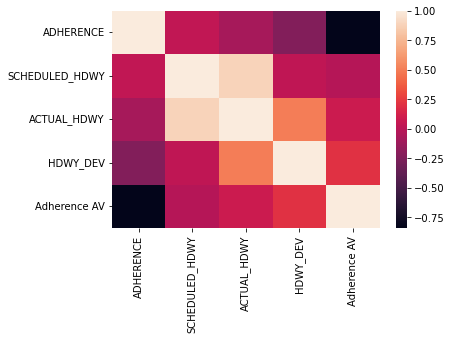

In [30]:
sns.heatmap(corr2.corr())

<AxesSubplot:>

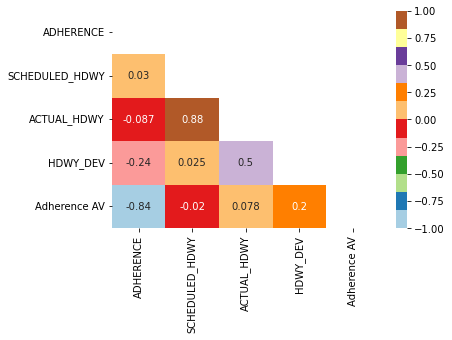

In [31]:
mask = np.triu(np.ones_like(corr2.corr()))
sns.heatmap(corr2.corr(),mask=mask, vmin=-1,vmax=1,annot=True,cmap='Paired')

In [32]:
corr2 = corr2.filter(['Adherence AV', 'SCHEDULED_HDWY', 'ACTUAL_HDWY', 'HDWY_DEV'], axis=1)

In [33]:
corr2 = corr2.rename(columns={'Adherence AV':'Adherence Absolute Value','SCHEDULED_HDWY':'Scheduled Headway','ACTUAL_HDWY':'Actual Headway','HDWY_DEV':'Headway Deviation'})

<AxesSubplot:>

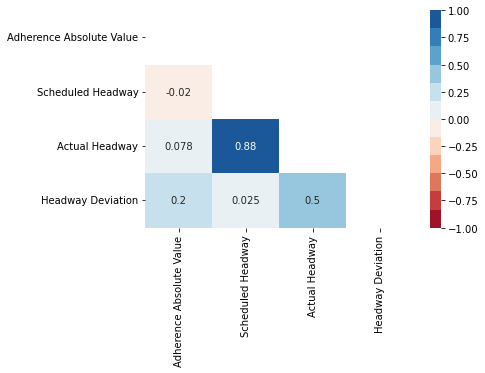

In [34]:
mask= np.triu(np.ones_like(corr2.corr()))
cmap=sns.color_palette('RdBu',12)
sns.heatmap(corr2.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap=cmap)

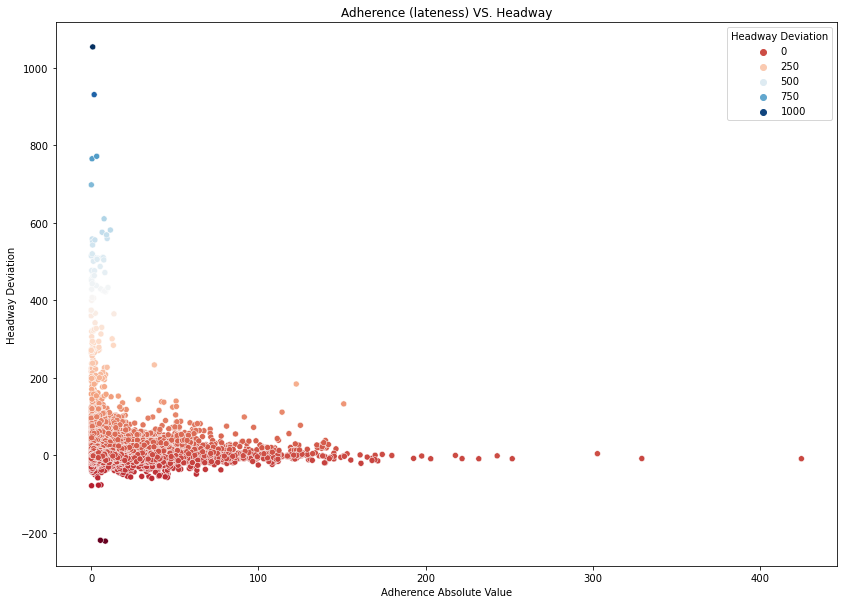

In [36]:
df=corr2
fig, ax=plt.subplots(figsize=(14,10))
sns.scatterplot(ax=ax,data=df, x = 'Adherence Absolute Value', y= 'Headway Deviation',hue='Headway Deviation',palette="RdBu")
plt.title("Adherence (lateness) VS. Headway")
plt.show()